In [25]:
# Import routines
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import glob

import cartopy.crs as ccrs
import cartopy.feature as cfeature

from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator, LongitudeLocator)

import pandas as pd

In [26]:
# Definitions

def Transform_NASAWorldview_Geotiff(file):
    # spatial reference system of cartopy maps
    target_proj = ccrs.NorthPolarStereo(central_longitude=10)
    #print(file)
    file_out = file.replace(".tif", "_reprojected.tiff")
    gdal.Warp(file_out,
              file,
              dstSRS = target_proj.proj4_init)
    print(file_out)
    return file_out


def read_worldview_reprojected(file):
    img = gdal.Open(file)
    data = img.ReadAsArray()
    # make background from black to white
    ix = data.sum(axis=0) == 0
    data[..., ix] = 255
    # get extent
    gt = img.GetGeoTransform()
    extent = (gt[0], gt[0] + img.RasterXSize * gt[1],
              gt[3] + img.RasterYSize * gt[5], gt[3])
    data = data.transpose((1, 2, 0))
    return data, extent

In [27]:
# Transform snapshot from Nasa Worldview to Cartopy maps format

file = "/Users/marcusklingebiel/Documents/Projects/14_HAWK_HALO-AC3/20220404_Analysis/Flighttrack_and_maps/snapshot-2022-04-04T00_00_00Z.tif"
file_trans = Transform_NASAWorldview_Geotiff(file)

/Users/marcusklingebiel/Documents/Projects/14_HAWK_HALO-AC3/20220404_Analysis/Flighttrack_and_maps/snapshot-2022-04-04T00_00_00Z_reprojected.tiff


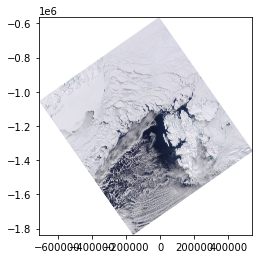

In [28]:
#Load reprojected GeoTiff Image

file = file_trans
img, extent = read_worldview_reprojected(file)

plt.imshow(img,extent=extent, origin='upper')

Text(0, 0.5, 'Latitude')

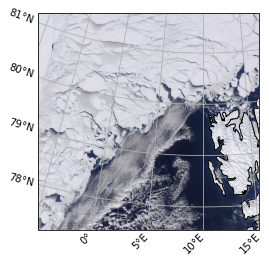

In [29]:
# Plot satellite picture on map

plt.figure(figsize=(4, 4))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=10))
ax.set_extent([-5, 15, 77.5, 81.5], crs=ccrs.PlateCarree())

ax.coastlines(resolution='10m')
ax.imshow(img,extent=extent, origin='upper')

#---------------------------------------------------
# Plot flight track
#ax.plot(lon_halo,lat_halo,
#         color='blue', linewidth=1,
#         transform=ccrs.PlateCarree(),
#         label="HALO"
#         )

# Plot dropsondes
#ax.scatter(ls_ds_lon,ls_ds_lat, marker="+", transform=ccrs.PlateCarree(), color="brown", zorder = 3)
#---------------------------------------------------

gl =  ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
gl.xlabel_style = {'rotation': 45}

gl.top_labels = False
gl.right_labels = False

plt.xlabel("Longitude")
plt.ylabel("Latitude")